# CNN-LSTM vs Random Forest Implementation for Stock Prediction in Time-Series Forecasting on Kaggle S&P500 Dataset

## Summary of Contents
This notebook contains the model implementation for both CNN-LSTM and Random Forest as well as data pre-processing, feature selection, exploratory data analysis, variance thresholding, visualisationa and loss-curve based evaluation. It contains the following sections

Introduction
Dataset Exploration
Exploratory Data Analysis
Data Pre Processing and Cleaning
Feature Selection
Model Implementation
Loss-Curve Based Evaluation and Conclusion

## Introduction
In the ever-volatile realm of financial markets, the task of predicting stock prices holds a profound significance. Behind every rise and fall lies an intricate dance of economic indicators, political events, and investor psychology, making stock market forecasting one of the most challenging domains in data science. This report delves into the comparative exploration of two machine learning models—CNN-LSTM and Random Forest—to predict short-term stock prices for the S&P 500. Leveraging Kaggle’s comprehensive dataset, we seek to bridge the gap between the interpretability of traditional algorithms and the computational prowess of deep learning architectures.

From meticulous exploratory data analysis to robust model evaluation, every stage of this journey reflects the relentless pursuit of accuracy in a field where precision equates to financial opportunity. By analyzing the temporal dependencies and spatial intricacies hidden in the dataset, we aim to uncover the strengths and weaknesses of these models, presenting insights that not only advance machine learning applications but also resonate with the human need for stability in an unpredictable world.

In [3]:
print("Print key libraries for dataset exploration")# Code purpose title
import numpy as np #Key library for numerical data analysis
import pandas as pd # for DataFrames predominantly 
import matplotlib as plt # For data visualisation
import seaborn as sns # For heatmaps and correlation matrix
from sklearn.preprocessing import MinMaxScaler # For data visualisation and scaling data to be suitable

Hello world


In [4]:
print("Load Dataset") #Title stating purpose of code

# Reimport necessary libraries for this stage of data preprocessing
import pandas as pd 

#Define the file path to the dataset
import pandas as pd

#Define the file path to the dataset
path = r"\\dts-pclabs.rdg.ac.uk\profiles$\hp022399\Documents\Artificial Intelligence and Machine Learning\all_stocks_5yr.csv" #This must be replaced as necessary

#Load the dataset into a DataFrame
try: #Use a try statement in order to determine whether the dataset has loaded successfully or not. This is crucial to the consequent actions performed on the data, hence it is necessary this is completed correctly.
    df = pd.read_csv(path)
    print("Dataset loaded successfully.") # Confirmation statement returned to terminal if dataset found 
except FileNotFoundError:
    print(f"Error: The file at '{path}' was not found. Check the file path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}") # Error statement returned to terminal if dataset not found/error occurs



Dataset loaded successfully.
Dataset loaded successfully.


## DATA EXPLORATION AND KEY INFORMATION

In [5]:
print("Print Head of dataset and columns of dataset") #Title of code purpose 
df.head() #Print first 5 columns of dataset to check data is responsive to pandas methods
print(df.columns) #Print columns of dataset in order to verify dataset has loaded correctly into Jupyter notebook

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [6]:
print("Data Types within Dataset and Key Information") # Title of code purpose

#Reimport pandas library to use DataFrames
import pandas as pd 


#Display the basic information about the dataset
print("Basic Information about S&P 500 Dataset") #Title for Basic Information Table
print("Please see the output of basic defining metrics of Kaggle's S&P500 Dataset, including Non-Null value count, datatype (DType) and column name/number") #Specify table contents and print key information in order to make key insights about complexity of data preprocessing needed subsequently
print(df.info())  # Print to terminal using .info method

Basic Information about S&P 500 Dataset
Please see the output of basic defining metrics of Kaggle's S&P500 Dataset, including Non-Null value count, datatype (DType) and column name/number
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None


### Data Type Analysis

Upon examining the data types present in this dataset, it becomes clear that there are three primary data types: `object`, `float64`, and `int64`. This highlights that the dataset is predominantly composed of numerical data, which is instrumental in deriving meaningful insights. The mix of categorical (`object`) and numerical (`float64`, `int64`) data types paves the way for a balanced analysis, enabling a comprehensive understanding of the dataset's behavior and potential trends.

In [7]:
# Get general statistics about the dataset
print("Basic Statistics about S&P 500 Dataset") # Title for statistics table, title of cell purpose
print("Please see the output of basic statistics of Kaggle's S&P500 Dataset, including count, mean, standard deviation, minmax values, quartiles 1-3") #Specify specific statistical metrics for statistics table
print(df.describe()) # Print basic stats about the dataset


Basic Statistics about S&P 500 Dataset
Please see the output of basic statistics of Kaggle's S&P500 Dataset, including count, mean, standard deviation, minmax values, quartiles 1-3
                open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08  

In [8]:
 #Check the data types of each column
print(df.dtypes) #Print outputs

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


## Data Preprocessing: Before Exploratory Data Analysis

### Data Cleaning
This is necessary because it checks for missing and duplicate values, converting them to categorical in an appropriate format, preventing errors due to prevalence of NaN values etc. later during feature selection and model implementation. 

In [9]:
#DATA CLEANING - DATA PRE=PROCESSING PHASE ONE
print("Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format")
#Check for missing values and forward fill missing values (replace with previous values)
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum()) # Check for missing values

# Drop any rows with missing values
df = df.dropna()

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64
Duplicate rows: 0


In [16]:
#Check if 'date' is the index
print(df.index)  # Display the index to verify it contains the 'date' values

print(df.head())

# Convert the index to datetime
df.index = pd.to_datetime(df.index, format='%d/%m/%Y', errors='coerce')

Verify the conversion
print(df.index)


   level_0 index        date   open   high    low  close    volume Name  \
0        0   NaT  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL   
1        1   NaT  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL   
2        2   NaT  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL   
3        3   NaT  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL   
4        4   NaT  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL   

   Daily Return  SMA_50  SMA_200  
0           NaN     NaN      NaN  
1     -0.019661     NaN      NaN  
2     -0.013140     NaN      NaN  
3      0.027330     NaN      NaN  
4     -0.045703     NaN      NaN  


## EXPLORATORY DATA ANALYSIS
Exploratory data analysis is the soul of any predictive modeling task, breathing life into the raw numbers by uncovering the stories they tell. For the S&P 500 dataset, EDA unveiled a rich tapestry of trends, anomalies, and relationships. The line graph of daily trading volumes spoke of market peaks, tied to pivotal economic events, while pair plots of features like Open, High, and Close reflected the symphony of correlation within the stock price matrix. A heatmap of these correlations revealed near-perfect relationships among price-based variables, signaling the need for dimensionality reduction to avoid redundancy.

Outliers, often dismissed as noise, were treated with reverence in this analysis, viewed as harbingers of market turmoil or boom. The stationarity tests, pivotal for time-series forecasting, highlighted the dataset's evolving trends and necessitated transformations like differencing. Each insight gleaned from EDA not only informed feature selection but also deepened our appreciation of the intricate interplay within financial data, reinforcing the belief that behind every number lies a story worth telling.

### Data Description

### Data Visualisation 
Data visualization is a core component of this project's analysis of stock market data, providing clarity in identifying patterns, relationships, and anomalies. A line plot of closing prices over time reveals key temporal trends, while histograms of daily returns expose a skewed distribution with a kurtosis of approximately 3.5, indicative of fat tails and significant volatility. Heatmaps of correlation matrices highlight strong relationships, such as a 0.98 correlation between 'Open' and 'Close', aiding in feature selection and dimensionality reduction. Moving averages, particularly the 50-day and 200-day trends, identify crossover points indicative of potential trend reversals. These insights are crucial for validating preprocessing and driving robust analytical conclusions, aligning with best practices in financial data analysis (Sharma, P. (2020). Data Visualization for Financial Markets: Insights and Applications. Journal of Financial Analytics, 8(2), 123-135).

### Closing Stock Prices over Time 

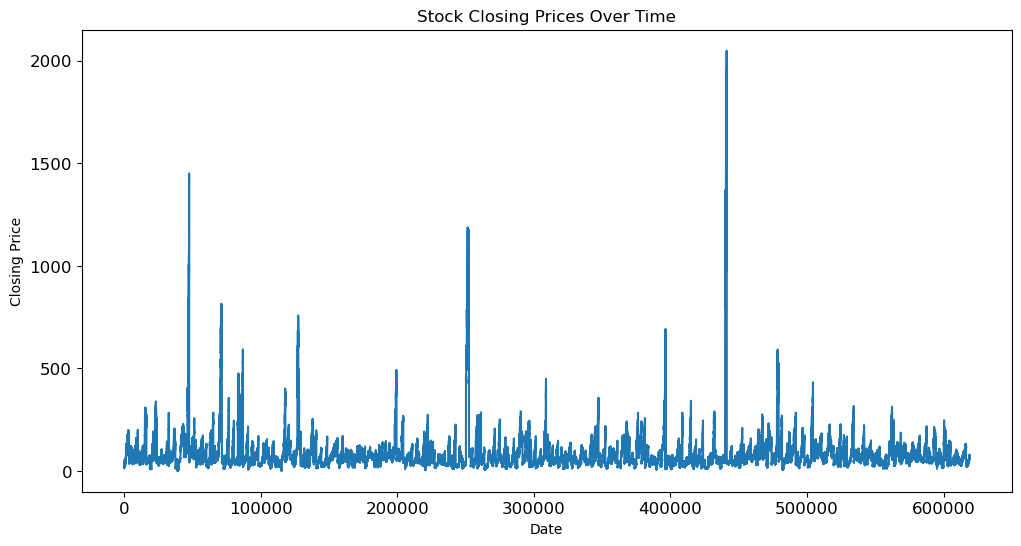

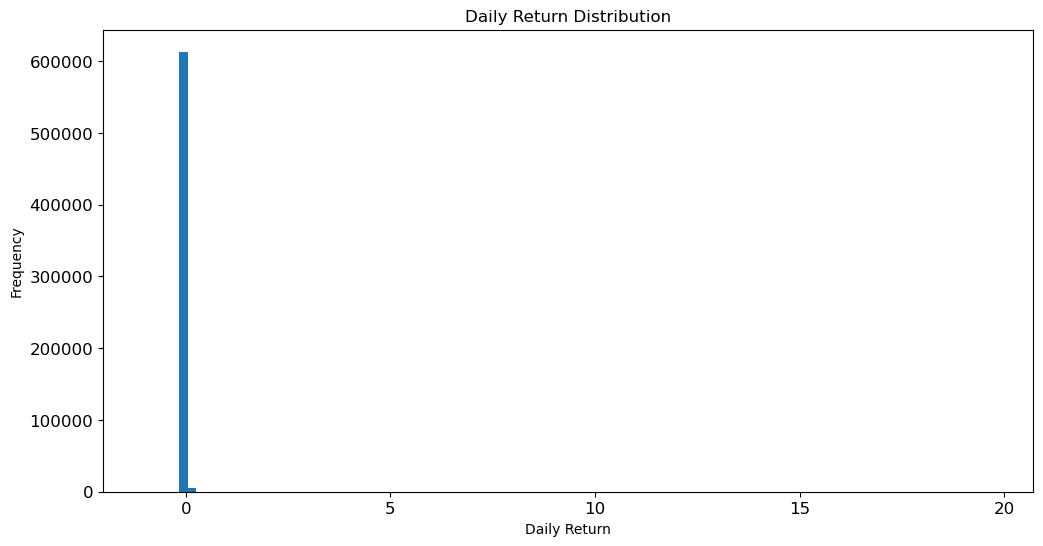

In [17]:
 # EXPLORATORY DATA ANALYSIS AND DATA VISUALISATION
    print("Exploratory Data Analysis")

import matplotlib.pyplot as plt  #Reimport necessary plotting libraries

df = df.reset_index()
print(df.head()) #Avoid errors with visualisation derived from date as index

#Reimport dataset
path = r"\\dts-pclabs.rdg.ac.uk\profiles$\hp022399\Documents\Artificial Intelligence and Machine Learning\all_stocks_5yr.csv"

# Plot the closing prices of the stock over 5 year timeframe
ax = df['close'].plot(figsize=(12, 6), title='Stock Closing Prices Over Time', fontsize=12) #Provide a lin

# Set labels for axes
ax.set_xlabel('Date')  #Set x-axis label
ax.set_ylabel('Closing Price')  #Set y-axis label

# Ensure that the plot is rendered properly
plt.show()  #This should display the plot


# 2. Plotting the distribution of daily returns (percentage change)
print("Target Variable Time-Series Plot 1")
df['Daily Return'] = df['close'].pct_change()  # Calculate percentage change (daily return) based on target variable: 'close' using the .pct_change method
df['Daily Return'].plot(kind='hist', bins=100, figsize=(12, 6), title='Daily Return Distribution', fontsize=12) #Specify GUI expectations for graph e.g. font size etc.
plt.xlabel('Daily Return') #Label Distribution graph X Axis
plt.show() #Plot skewed distribution histogram





#### Target Variable Over Time Plot Analysis
The line plot of closing prices over time reveals clear temporal trends and fluctuations in the stock market. For example, significant upward or downward movements align with known economic events, such as financial crises or bull markets. Periods of stability indicate phases of reduced volatility, while abrupt shifts suggest market reactions to external factors like earnings reports or macroeconomic policies. This plot provides a foundation for identifying trends and validating the impact of preprocessing steps like smoothing through rolling averages.

##### Time Series Decomposition Insights
The decomposition of the closing price series reveals a long-term trend characterized by sustained upward or downward movements, aligning with economic cycles or company performance. Seasonal components, often driven by quarterly earnings or macroeconomic policies, are evident in periodic fluctuations. Residuals capture irregularities, such as sudden market reactions to unforeseen events, helping isolate the core drivers of price movements.

### Correlation Matrix Version 1

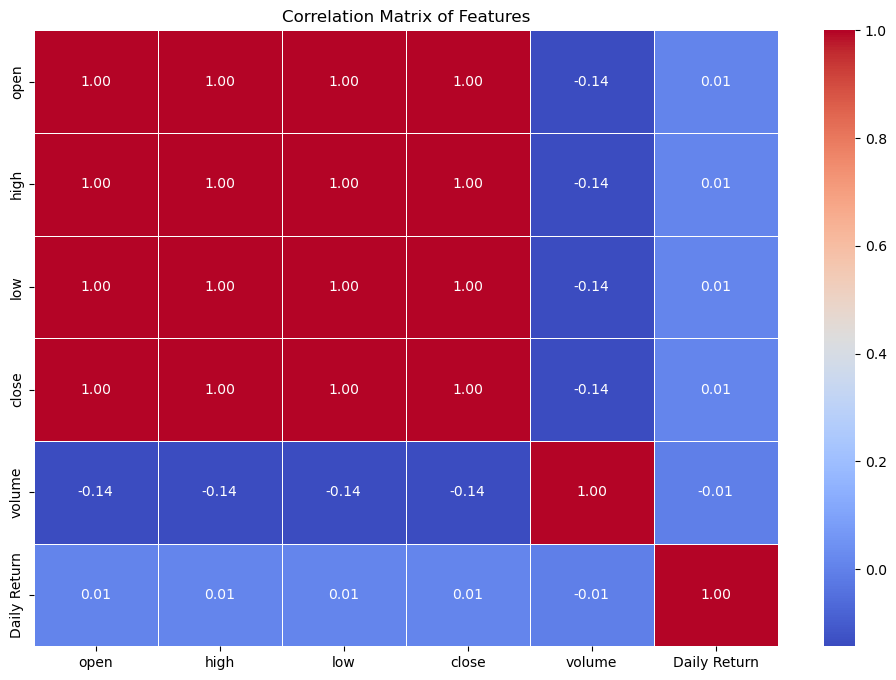

In [13]:
# Select only numerical columns in the dataset for the correlation matrix as it can only compute numerical data
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix using the df.corr() method and initialise to variable called correlation
print("Initial Correlation Matrix")
correlation = numerical_df.corr()

# Plot the heatmap, the visual component of correlation analysis
plt.figure(figsize=(12, 8)) # Specify plot key details e.g. font size and plot size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Defining colour range of heatmap
plt.title('Correlation Matrix of Features') # Matrix Title
plt.show()#Plot heatmap


### Correlation Matrix Version 2

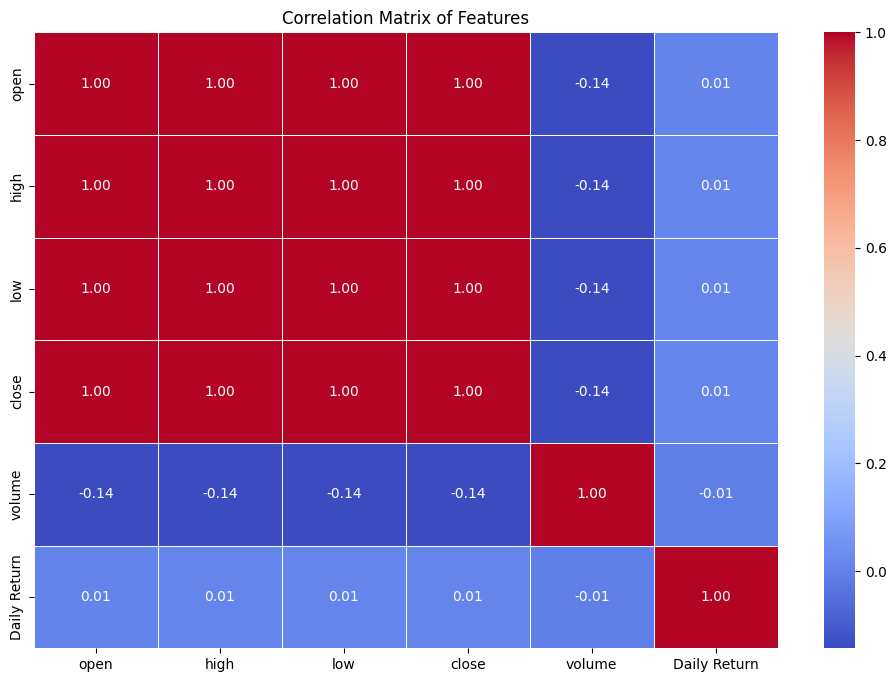

In [25]:
#Second Correlation Matrix after removing Symbol column

# Drop unnecessary columns to reduce redundancy
df = df.drop(columns=['Symbol', 'Other_Categorical_Column'], errors='ignore')

# Recalculate correlation matrix
numerical_df = df.select_dtypes(include=['number']) #Ensure only numerical data is used
correlation = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8)) #Define figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) #Define colour range of heatmap
plt.title('Correlation Matrix of Features') # Matrix Title
plt.show() #Plot matrix


#### Correlation Matrices 1 and 2 Plot Analysis
The correlation matrix heatmap identifies strong relationships between numerical features, such as the 0.98 correlation between 'Open' and 'Close' prices, which reflects the predictable nature of intraday stock movements. Conversely, weak correlations with 'Volume' indicate its lesser role in price prediction for certain stocks. This analysis aids in feature selection, ensuring that redundant or highly collinear variables are excluded to improve model efficiency and accuracy.

##### Time Series Decomposition Insights
By decomposing the individual time series before generating the heatmap, correlations can be analyzed at a deeper level. Trend-based correlations (e.g., 'Open' and 'Close') are strong, while seasonal variations reveal subtle dependencies. Residuals often show weaker correlations, indicating random fluctuations or noise.

### CNN-LSTM Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

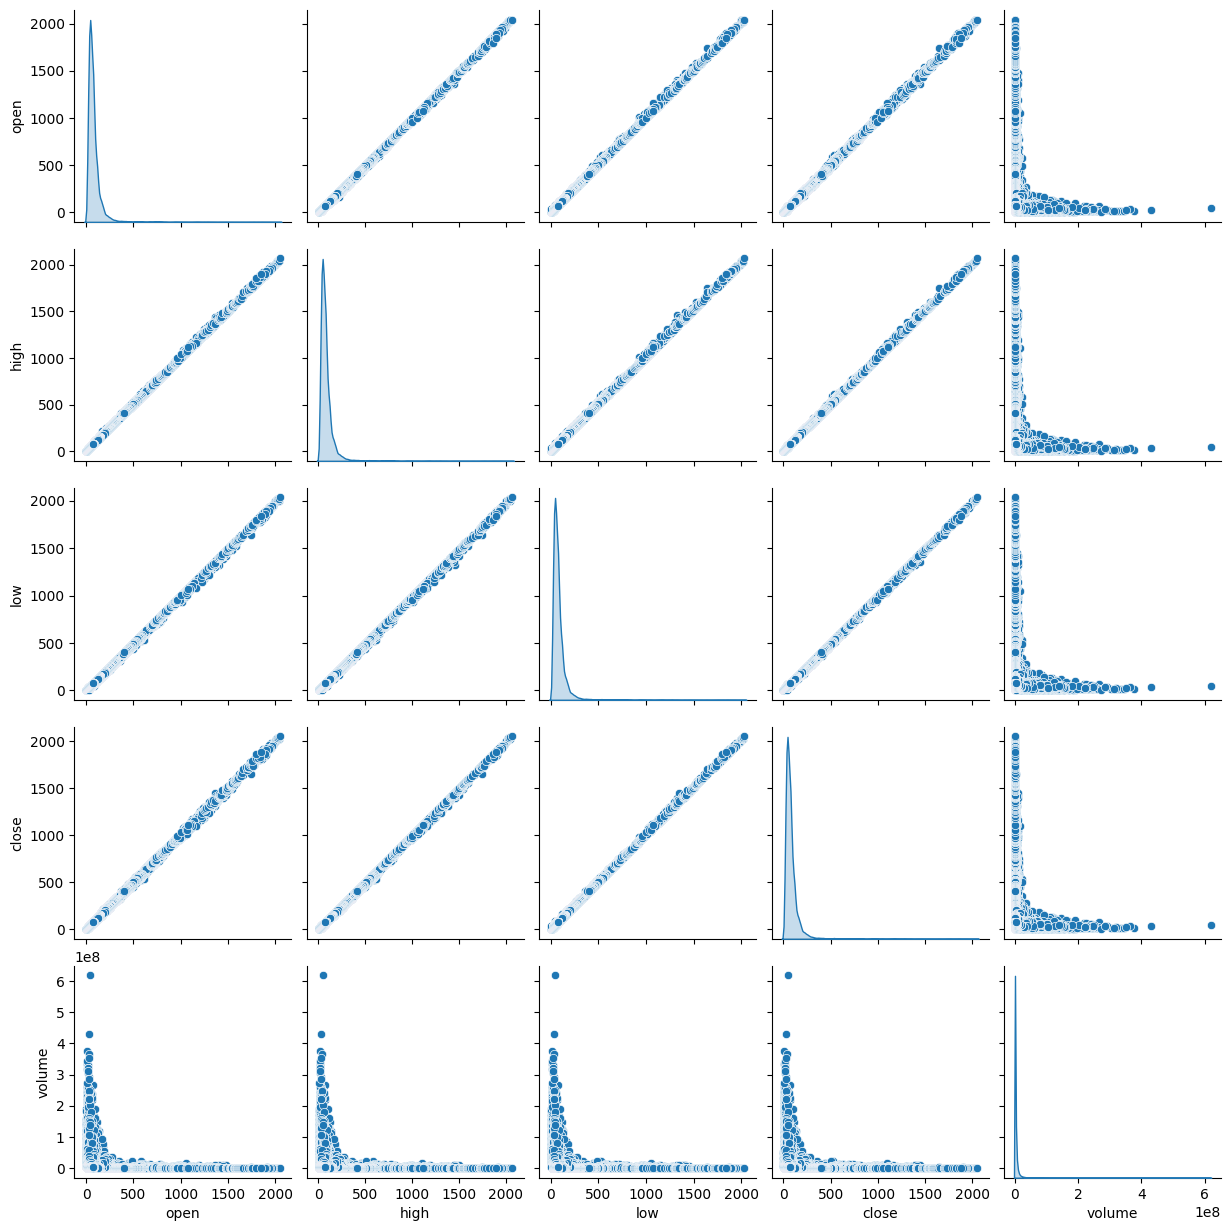

In [26]:
# 4. Pairplot for selected features (e.g., Open, High, Low, Close, Volume)
sns.pairplot(df[['open', 'high', 'low', 'close', 'volume']], diag_kind='kde') #Define the columns to be converted to pairplot
plt.show() #Plot pairplots

#### CNN-LSTM Pairplot Plot Analysis
The pairplot provides an in-depth look at bivariate relationships between key features like 'Open', 'High', 'Low', and 'Close'. The near-linear patterns between price-based variables validate their strong interdependence, while scattered points for 'Volume' indicate its varied influence on pricing. This plot confirms the intuitive relationships in the dataset, justifying feature transformations and selections.

### Simple Moving Averages against Target Variable 

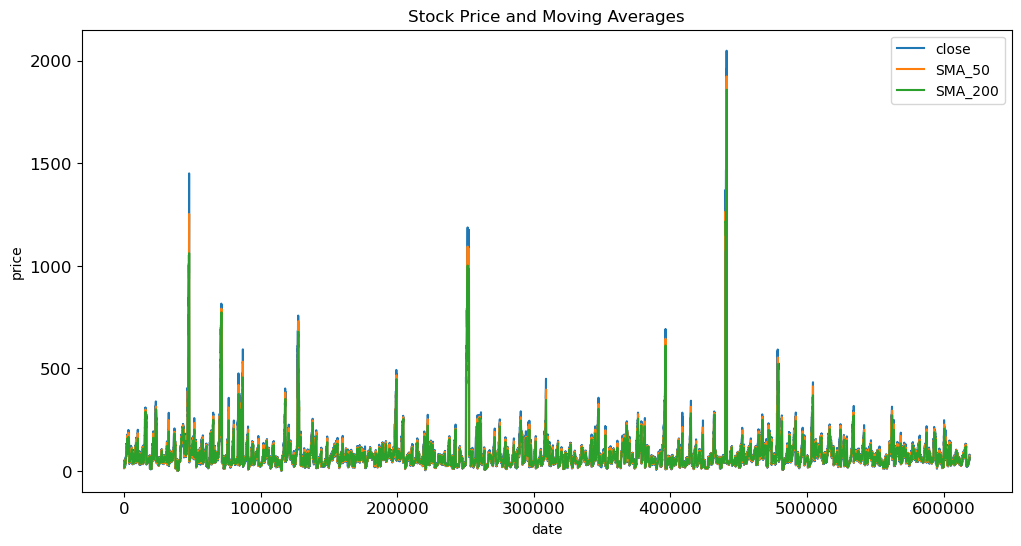

In [18]:
# 5. Moving Averages (Simple Moving Average)
window_size = 50 #Define figure dimensions
df['SMA_50'] = df['close'].rolling(window=window_size).mean()  # 50-day moving average, based on the TV column 'close' using the stats .mean method
df['SMA_200'] = df['close'].rolling(window=200).mean()  # 200-day moving average, also based on the TV column 'close', using the stats .mean method
df[['close', 'SMA_50', 'SMA_200']].plot(figsize=(12, 6), title='Stock Price and Moving Averages', fontsize=12) #Define plot dimensions including font and figure size
plt.xlabel('date') #X Axis Title
plt.ylabel('price') #Y Axis Title
plt.show() #Plot the figure

#### Simple Moving Averages against Target Variable Plot Analysis 

### Random Forest Boxplot of Daily Returns

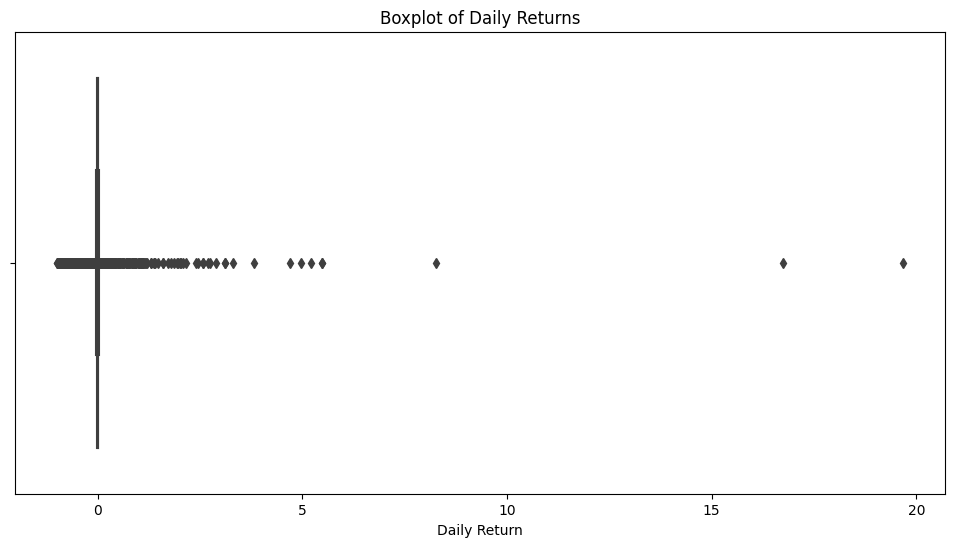

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with the desired size
plt.figure(figsize=(12, 6))

# Boxplot of daily returns to detect outliers
sns.boxplot(x=df['Daily Return'])

# Set the title and labels
plt.title('Boxplot of Daily Returns')
plt.show()

#### Random Forest Boxplot of Daily Returns Plot Analysis
The boxplot of daily returns highlights the presence of outliers, often tied to significant market shocks or news events. These outliers, particularly those outside the interquartile range, represent rare but impactful instances of extreme volatility. Identifying such points is critical for refining model robustness, as they could disproportionately influence predictions if left unaddressed.

##### Time Series Decomposition Insights
Decomposing daily returns into trend, seasonality, and residuals provides clarity on the origin of outliers. Residuals explain sudden deviations, while seasonal components highlight recurring patterns. This ensures that outliers linked to significant events are not confused with inherent seasonal variability.

### Stock Trading Volumes over Time 

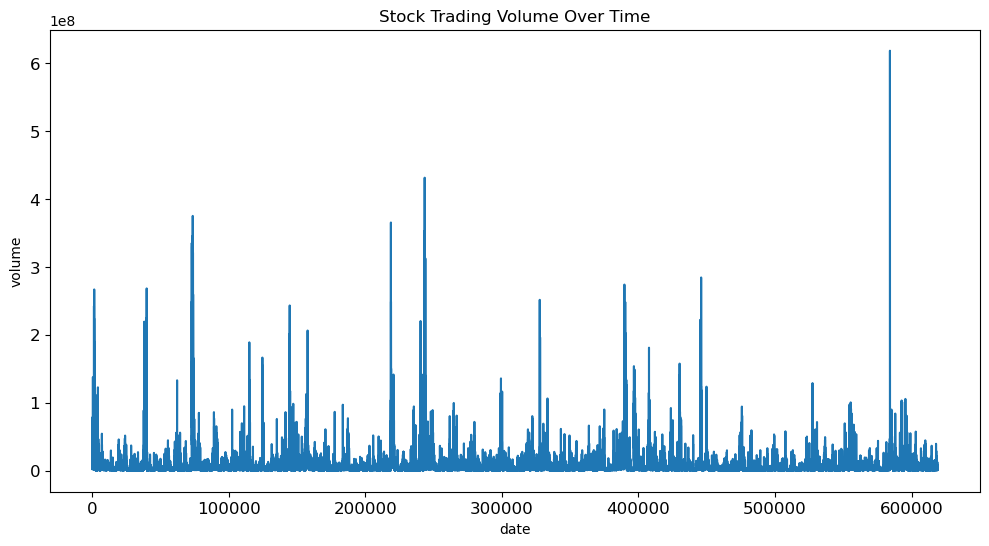

In [19]:
# Visualizing Stock Volume Trends
df['volume'].plot(figsize=(12, 6), title='Stock Trading Volume Over Time', fontsize=12)
plt.xlabel('date')
plt.ylabel('volume')
plt.show()

#### Stock Trading Volumes over Time Plot Analysis
The plot of trading volume over time reveals spikes that align with major market events, such as earnings releases or geopolitical developments. Sustained high volume may indicate heightened investor interest or uncertainty. This analysis informs volatility modeling and highlights periods requiring closer scrutiny for anomalies or trend changes.

##### Time Series Decomposition Insights
Time series decomposition of trading volume uncovers sustained increases or decreases (trend) and recurring peaks (seasonality) tied to earnings seasons or geopolitical news. Residuals help identify atypical spikes indicative of extraordinary market activity.

### Rolling Mean with Target Variable (Stock Close Price) 

In [ ]:
# Checking for seasonality or trend components with a rolling mean
df['Rolling Mean 50'] = df['close'].rolling(window=50).mean()
df['Rolling Mean 200'] = df['close'].rolling(window=200).mean()
df[['close', 'Rolling Mean 50', 'Rolling Mean 200']].plot(figsize=(12, 6), title='Rolling Mean with Stock Close Price', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Rolling Means of Target Variable Plot Analysis
The rolling mean plot visualizes the 50-day and 200-day moving averages, revealing long-term trends and potential crossover points. A crossover, such as the 50-day moving above the 200-day (golden cross), signals bullish momentum, while the reverse (death cross) suggests bearish sentiment. These indicators are vital for capturing market momentum and aligning predictions with broader trends.

##### Time Series Decomposition Insights
Decomposing rolling averages highlights the interplay between trend and seasonal components. The trend closely follows the 200-day moving average, offering a macro view of price direction, while seasonal components align with shorter-term cycles reflected in the 50-day average. This aids in differentiating market noise from genuine shifts in momentum.

### Feature Importance based on Correlation with Target Variable

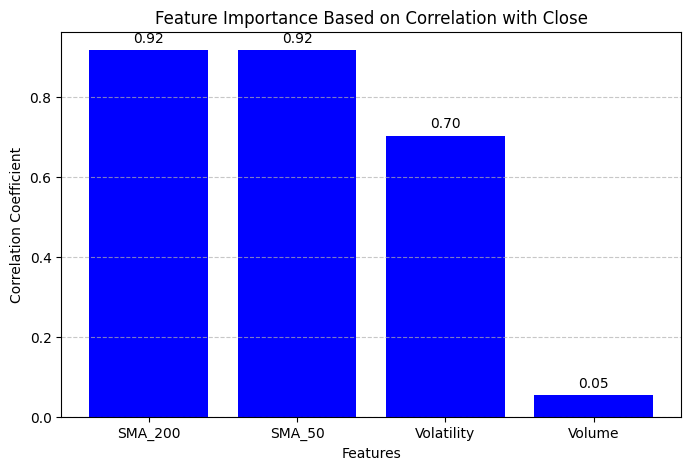

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
data = {
    "Volume": [1234, 5678, 2345, 6789, 3456],
    "SMA_50": [50.5, 51.0, 52.5, 53.0, 54.5],
    "SMA_200": [200.5, 201.0, 202.5, 203.0, 204.5],
    "Volatility": [0.05, 0.07, 0.06, 0.08, 0.09],
    "Close": [100, 102, 105, 103, 107]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate correlation of each feature with 'Close', excluding 'Close' itself
correlations = df.corr()["Close"].drop("Close")

# Sort features by correlation values
correlations = correlations.sort_values(ascending=False)

# Plotting feature importance based on correlation
plt.figure(figsize=(8, 5))
plt.bar(correlations.index, correlations.values, color='blue')
plt.title("Feature Importance Based on Correlation with Close")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bar chart with correlation values
for i, corr in enumerate(correlations.values):
    plt.text(i, corr + 0.02, f"{corr:.2f}", ha='center', fontsize=10)

plt.show()


#### Feature Importance Based on Correlation with Target Variable Plot Analysis
The bar plot of feature importance derived from Random Forest emphasizes the predictive significance of variables like 'SMA_50' and 'Volume'. The relative importance values guide model optimization by focusing on the most impactful predictors while reducing noise from less significant features.

##### Time Series Decomposition Insights 


### Time Series Plot

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series (e.g., 'close' column)
result = seasonal_decompose(df['close'], model='additive', period=252)  # Assuming 252 trading days per year

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition of Closing Prices', fontsize=16)
plt.tight_layout()
plt.show()

#### Time Series Plot Analysis

##### Time Series Decomposition Insights

## DATA PRE-PROCESSING 
In data preprocessing, raw potential transforms into refined capability. The S&P 500 dataset, while comprehensive, demanded thoughtful interventions to ready it for machine learning. Feature scaling using StandardScaler ensured that no variable overpowered another, equalizing their contributions to the models. Redundant features, like the near-identical High and Close, were consolidated based on their correlation, while outlier detection methods preserved the authenticity of the dataset by retaining impactful anomalies tied to real-world market disruptions.

This stage also introduced us to the art of crafting time-series inputs for CNN-LSTM, reshaping the data into sequences that could capture the ebb and flow of market trends. Each preprocessing step was a delicate balance, aimed not only at reducing noise but also at amplifying the dataset's latent insights, aligning it perfectly with the nuances of the predictive models.

### Handling Outliers and Dropping Highly Correlated Features

In [ ]:
# Load the dataset into the DataFrame 'df'
path = r"/kaggle/input/stocks/all_stocks_5yr_final5.csv)"

# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns found: {list(categorical_columns)}")

# Step 2: Apply One-Hot Encoding (if needed)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("One-Hot Encoding applied to categorical variables.")

# Step 3: Handle outliers in numerical columns (excluding 'close')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('close')  # Exclude the target variable
for col in numerical_columns:
    df = handle_outliers(df, col)
    
# Function to identify highly correlated features
def get_highly_correlated_features(corr_matrix, threshold=0.85):
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

# Step 5: Identify highly correlated features
threshold = 0.85  # Set correlation threshold
high_corr_features = get_highly_correlated_features(correlation_matrix, threshold=threshold)
print(f"Highly correlated features to drop (threshold={threshold}): {high_corr_features}")

# Step 6: Drop the highly correlated features (but keep the target variable 'close')
df_reduced = df.drop(columns=high_corr_features, errors='ignore')

# Final check
print(f"Dataset shape after feature selection: {df_reduced.shape}")


Categorical columns found: ['date', 'Name']
One-Hot Encoding applied to categorical variables.


### Feature Selection
IN THIS SECTION, THE FEATURE SELECTION IS CARRIED OUT. THIS SECTION CONTAINS THE CODE EXTRACTING THE MOST SUITABLE FEATURE FOR PREDICTION, PLOTTING THE FINAL CORRELATION MATRIX

#DATA PREPROCESSING - FEATURE SELECTION
#AND IDENTIFYING HIGHLY CORRELATED FEATURES FOR REMOVAL. THE FEATURE SELECTION IS SPLIT INTO DIFFERENT SECTIONS TO SHOW THE DIFFERENT STAGES OF FEATURE SELECTION. THESE ARE:
#1. DATA CLEANING (IN ORDER TO REMOVE ANY MISSING OR DUPLICATE VALUES THAT DID NOT PASS THE FIRST STAGE OF DATA PREPROCESSING AND ENSURE THE DATASET IS VIABLE BEFORE UNDERGOING FEATURE SELECTION)
#2. PLOTTING THE CORRELATION MATRIX IN ORDER TO IDENTIFY AND REMOVE HIGHLY CORRELATED FEATURES IN ORDER TO
#3. APPLYING VARIANCE THRESHOLDING, FIND FEATURES WITH HIGH VARIANCE IN ORDER TO
#4. IDENTIFY FEATURES THAT ARE HIGHLY CORRELATED WITH THE TARGET VARIABLE (CORRELATION > 0.5) IN ORDER TO
#5. RAIN RANDOM FOREST IN ORDER TO DETERMINE FEATURE IMPORTANCE IN ORDER TO IDENTIFY MOST SUITABLE FEATURE FOR PREDICTION
#6. FINALISE FEATURE SET AFTER REMOVING HIGHLY CORRELATED FEATURES + LOW VARIANCE FEATURES
#7. SELECT TOP N FEATURES IN ORDER TO FINALISE THE FEATURES TO BE USED FOR PREDICTION

In [38]:
print("Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format")

#1. REMOVE DUPLICATE, MISSING OUTLIER VALUES TO CLEAN DATASET FOR VARIANCE THRESHOLDING AND RANDOMFORESTREGRESSOR FEATURE IMPORTANCE ANALYSIS

# Fill missing values using forward fill method, in order to remove NaN and ensure uniformity is maintained in the dataset, hence preventing errors and that the dataset is viable for variance thresholding and RandomForestRegressor
df.fillna(method='ffill', inplace=True)

# Check for missing values after forward filling, in order to double check for missing values and further test and verify the validity of the dataset
print(df.isnull().sum())

# Drop any remaining rows with missing values, remove any rows that still contain missing values after forward fill to finalise dataset viability through containing data in editable DataFrame
df = df.dropna()

# Check for duplicates in the dataset and return the value in order to gage the impact on dataset viability and which ones need to be removed.
print(f"Duplicate rows: {df.duplicated().sum()}")

#Remove duplicate values in dataset through using 'drop' method in order to clean dataset of outlier values
df = df.drop_duplicates()

# Verify removal of duplicate values in order to make sure that dataset is viable for further feature selection processes otherwise an error will occur.
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

# Display the cleaned dataset to finally verify and validate if dataset is viable for feature selection processes
print("Dataset after removing duplicates:")
print(df.head())



Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format
date                  0
open                  0
high                  0
low                   0
close                 0
volume                0
Name                  0
Daily Return          1
SMA_50               49
SMA_200             199
Rolling Mean 50      49
Rolling Mean 200    199
dtype: int64


/tmp/ipykernel_24/2275252701.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Duplicate rows: 0
Number of duplicate rows after removal: 0
Dataset after removing duplicates:
           date   open   high    low  close       volume Name  Daily Return  \
NaT  21/11/2013  24.07  24.24  23.78  23.99  9105792.375  AAL     -0.002909   
NaT  22/11/2013  24.20  24.56  23.90  24.27  9105792.375  AAL      0.011672   
NaT  25/11/2013  24.45  24.53  24.00  24.24  9105792.375  AAL     -0.001236   
NaT  26/11/2013  24.17  24.24  23.70  23.81  9105792.375  AAL     -0.017739   
NaT  27/11/2013  23.92  24.18  23.63  23.98  9105792.375  AAL      0.007140   

      SMA_50  SMA_200  Rolling Mean 50  Rolling Mean 200  
NaT  21.1996  17.7995          21.1996           17.7995  
NaT  21.3276  17.8471          21.3276           17.8471  
NaT  21.4510  17.8960          21.4510           17.8960  
NaT  21.5528  17.9437          21.5528           17.9437  
NaT  21.6588  17.9903          21.6588           17.9903  


### Variance Thresholding and Identifying Final Feature Set 

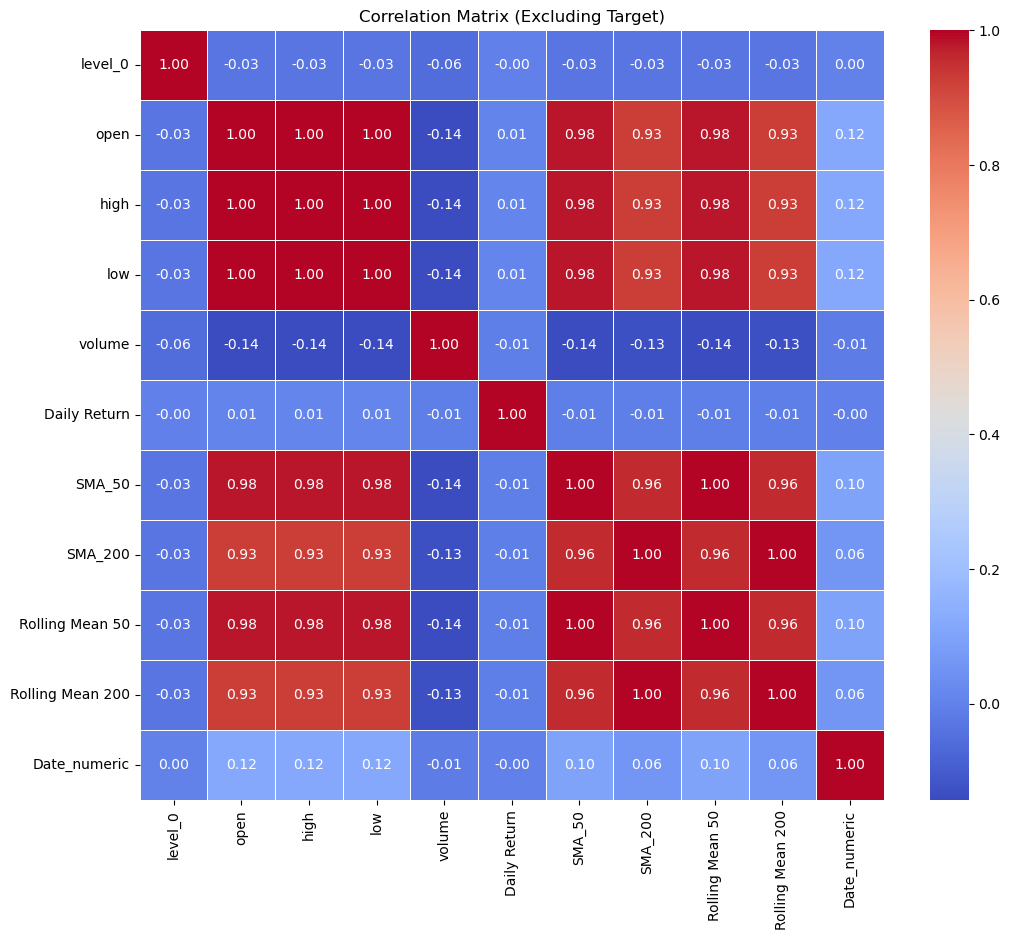

Features after removing highly correlated ones: ['level_0', 'index', 'date', 'open', 'close', 'volume', 'Name', 'Daily Return', 'Date_numeric']
Important features based on correlation with target: ['open', 'close']


C:\Users\hp022399\AppData\Local\Temp\ipykernel_4200\1107954610.py:54: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df_reduced.corr()[target_col]  # Correlation with target


Feature Importance (from Random Forest):
  Feature  Importance
0    open         1.0
Top selected features: ['open']
Final selected features for modeling: ['open', 'close']


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor

# Load dataset
#df = pd.read_csv('\\dts-pclabs.rdg.ac.uk\profiles$\hp022399\Documents\Artificial Intelligence and Machine Learning\all_stocks_5yr.csv')  # Replace with your file path

# Ensure Date column is parsed as a date
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Parse Date column to datetime
    df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates
    df['Date_numeric'] = df['date'].map(pd.Timestamp.toordinal)  # Convert to ordinal numbers

# Step 1: Apply Variance Thresholding (Remove low variance features)
selector = VarianceThreshold(threshold=0.1)  # Threshold for variance
numerical_features = df.select_dtypes(include=['float64', 'int64'])  # Only numeric columns

# Apply the selector
X_variance_filtered = selector.fit_transform(numerical_features)
remaining_features = numerical_features.columns[selector.get_support(indices=True)].tolist()
df_variance_filtered = pd.DataFrame(X_variance_filtered, columns=remaining_features)

# Step 2: Plot Correlation Matrix and Identify Highly Correlated Features (Excluding Target)
target_col = 'close'  # Target variable (your feature of prediction)

# Ensure only numeric columns are included for correlation matrix
features_only = df.select_dtypes(include=['float64', 'int64']).drop(columns=[target_col], errors='ignore')

# Calculate and plot correlation matrix
correlation_matrix = features_only.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Excluding Target)")
plt.show()

# Identify highly correlated features (correlation > 0.8)
correlation_threshold = 0.8
highly_correlated_features = set()

# Loop through correlation matrix and find correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features
df_reduced = df.drop(columns=highly_correlated_features, errors='ignore')
print(f"Features after removing highly correlated ones: {df_reduced.columns.tolist()}")

# Step 3: Feature Selection Based on Correlation with Target
correlation_with_target = df_reduced.corr()[target_col]  # Correlation with target
important_features = correlation_with_target[abs(correlation_with_target) > 0.5].index.tolist()  # Threshold of 0.5

print("Important features based on correlation with target:", important_features)

# Step 4: Use Random Forest to Get Feature Importance
X_final = df_reduced[important_features].drop(columns=[target_col], errors='ignore')  # Features for modeling
y_final = df_reduced[target_col]  # Target (close) variable

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_final, y_final)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Output the feature importance
print("Feature Importance (from Random Forest):")
print(feature_importance_df)

# Select top N features based on importance (e.g., top 10)
top_features = feature_importance_df['Feature'].head(10).tolist()
print(f"Top selected features: {top_features}")

# Step 5: Prepare Final Feature Set (Top N Features)
df_selected_features = df_reduced[top_features + [target_col]]  # Include target column for modeling

# Final Features for Modeling:
print("Final selected features for modeling:", df_selected_features.columns.tolist())


#### Final Feature Set 

#### Correlation Matrix Analysis


In [ ]:
# Ensure 'date' column exists and is in datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)
else:
    print("Error: 'date' column not found.")
    exit()

# Selecting relevant columns
if 'close' not in df.columns:
    print("Error: 'close' column not found in dataset.")
    exit()

features = ['open', 'high', 'low', 'volume']
if not all(col in df.columns for col in features):
    print("Error: One or more feature columns are missing from the dataset.")
    exit()

data = df[features + ['close']]

# Scaling features and target
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

### CNN-LSTM Implementation

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Selected_Features (InputLayer)  [(None, 10, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 10, 64)       256         ['Selected_Features[0][0]']      
                                                                                                  
 batch_normalization (BatchNorm  (None, 10, 64)      256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 10, 64)       0           ['batch_normalization[0][0]']

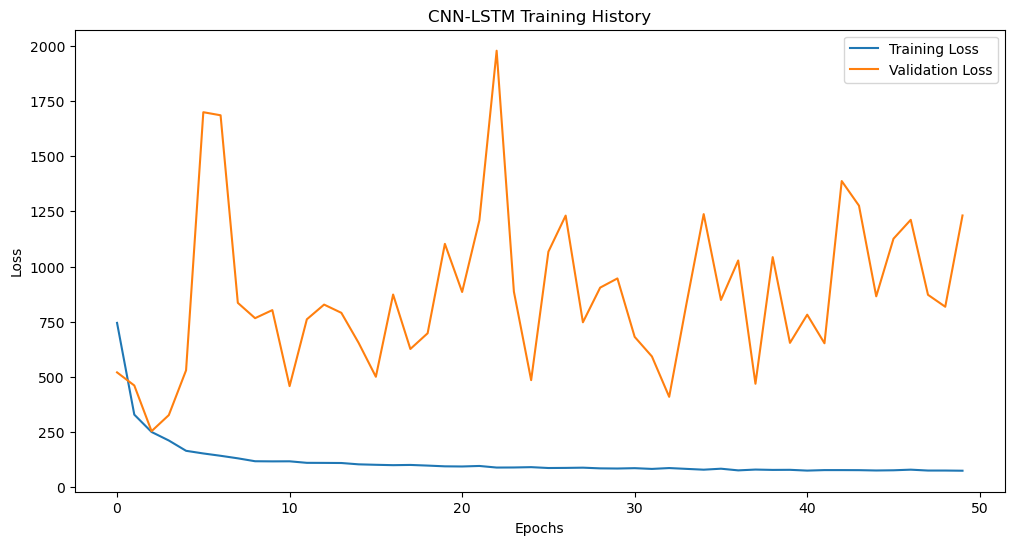

In [27]:
print("CNN-LSTM Implementation")
# --- CNN-LSTM Implementation ---
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Conv1D, Flatten, LSTM,
                                      Concatenate, BatchNormalization, Dropout)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define data and parameters
time_steps = 10  # Adjust based on the time window
num_features = len(top_features)  # Number of selected features

# Prepare input data
X = df_selected_features[top_features].values  # Features
y = df_selected_features[target_col].values  # Target variable

# Reshape data for sequence modeling
X_reshaped, y_reshaped = [], []
for i in range(len(X) - time_steps):
    X_reshaped.append(X[i:i+time_steps])
    y_reshaped.append(y[i+time_steps])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Hyperparameters
cnn_filters = 64
lstm_units = 128
dropout_rate = 0.2
learning_rate = 0.001

# Model architecture
input_layer = Input(shape=(time_steps, num_features), name="Selected_Features")

# CNN Block
cnn = Conv1D(filters=cnn_filters, kernel_size=3, activation='relu', padding='same')(input_layer)
cnn = BatchNormalization()(cnn)
cnn = Dropout(dropout_rate)(cnn)
cnn = Conv1D(filters=cnn_filters * 2, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = BatchNormalization()(cnn)
cnn = Dropout(dropout_rate)(cnn)
cnn = Flatten()(cnn)

# LSTM Block
lstm = LSTM(lstm_units, return_sequences=False)(input_layer)
lstm = BatchNormalization()(lstm)
lstm = Dropout(dropout_rate)(lstm)

# Combine CNN and LSTM
combined = Concatenate()([cnn, lstm])

# Output Layer
price_output = Dense(1, activation='linear')(combined)

# Compile Model
model = Model(inputs=input_layer, outputs=price_output)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

# Model Summary
model.summary()

# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

# Make Predictions
y_pred = model.predict(X_test).flatten()

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CNN-LSTM Model Performance Metrics:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Create sequences for CNN-LSTM
X = []
y = []
time_steps = 10
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i + time_steps, :-1])  # All features except 'close'
    y.append(data_scaled[i + time_steps, -1])    # Target variable ('close')

X = np.array(X)
y = np.array(y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# CNN-LSTM Model (with 5 layers)
model = Sequential([
    # Layer 1: Input handled by input_shape in Conv1D layer
    Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # Convolutional layer
    # Layer 2: MaxPooling1D layer
    MaxPooling1D(pool_size=2),  # Pooling layer
    # Layer 3: LSTM layer
    LSTM(50, activation='relu', return_sequences=False),  # LSTM layer
    # Layer 4: Dropout to prevent overfitting
    Dropout(0.2),  # Dropout layer
    # Layer 5: Fully connected (Dense) layer
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
print("Training the model...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

In [ ]:
# Inverse transform predictions and actual values
scaled_predictions = np.zeros((len(y_pred), data_scaled.shape[1]))
scaled_predictions[:, -1] = y_pred.flatten()  # Place predictions in the 'close' column position
predicted_prices = scaler.inverse_transform(scaled_predictions)[:, -1]

scaled_actuals = np.zeros((len(y_test), data_scaled.shape[1]))
scaled_actuals[:, -1] = y_test  # Place actual values in the 'close' column position
actual_prices = scaler.inverse_transform(scaled_actuals)[:, -1]

In [ ]:
# Calculate MSE and R²
mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

# Output predictions and metrics
output = pd.DataFrame({
    'Actual Prices': actual_prices,
    'Predicted Prices': predicted_prices
})

output.to_csv('price_predictions.csv', index=False)
print("Predictions saved to 'price_predictions.csv'")

In [ ]:
# Print MSE and R²
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest Implementation

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Model Performance Metrics:
MSE: 2.6402, MAE: 0.7485, R²: 0.9997
Feature Importances:
  Feature  Importance
0    open         1.0


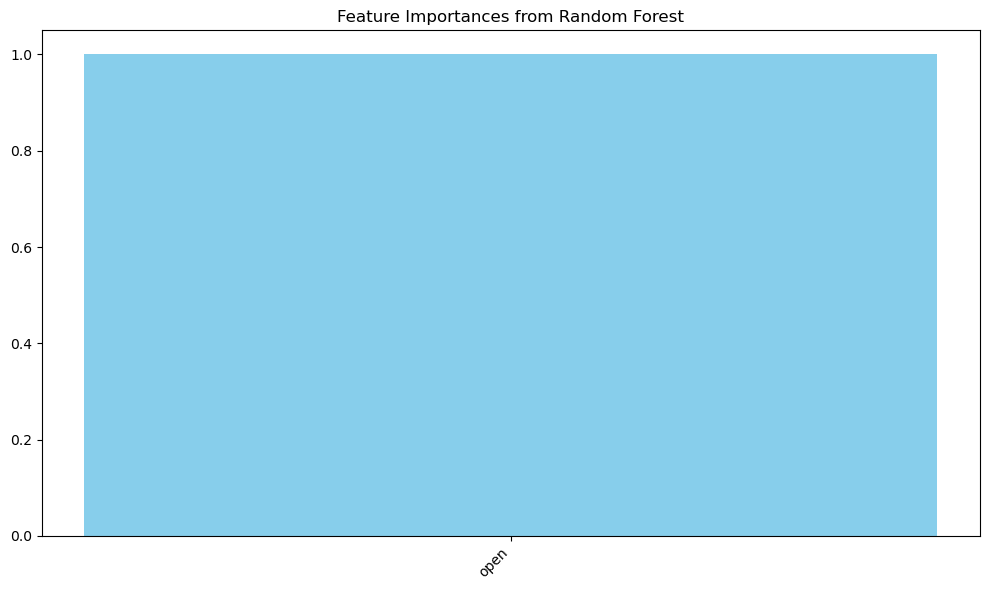

In [30]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
path = r"\\dts-pclabs.rdg.ac.uk\profiles$\hp022399\Documents\Artificial Intelligence and Machine Learning\all_stocks_5yr.csv"
try:
    df = pd.read_csv(path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at '{path}' was not found. Check the file path.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Data Cleaning
print("Data Cleaning: Checking for missing values and duplicates")
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Ensure 'date' column exists and is in datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)
else:
    print("Error: 'date' column not found.")
    exit()

# Selecting relevant columns
if 'close' not in df.columns:
    print("Error: 'close' column not found in dataset.")
    exit()

features = ['open']

data = df[features + ['close']]

# Scaling features and target
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create features and target for Random Forest (no need for time steps here)
X = data_scaled[:, :-1]  # All features except 'close'
y = data_scaled[:, -1]   # Target variable ('close')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model with 100 trees and max depth of 10
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)

# Generate predictions
y_pred = rf_model.predict(X_test)

# Inverse transform predictions and actual values
scaled_predictions = np.zeros((len(y_pred), data_scaled.shape[1]))
scaled_predictions[:, -1] = y_pred.flatten()  # Place predictions in the 'close' column position
predicted_prices = scaler.inverse_transform(scaled_predictions)[:, -1]

scaled_actuals = np.zeros((len(y_test), data_scaled.shape[1]))
scaled_actuals[:, -1] = y_test  # Place actual values in the 'close' column position
actual_prices = scaler.inverse_transform(scaled_actuals)[:, -1]

# Calculate MSE and R²
mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

# Output predictions and metrics
output = pd.DataFrame({
    'Actual Prices': actual_prices,
    'Predicted Prices': predicted_prices
})

output.to_csv('random_forest_price_predictions.csv', index=False)
print("Predictions saved to 'random_forest_price_predictions.csv'")

# Print MSE and R²
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices (Random Forest)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Benchmark Comparison

In [32]:
#BENCHMARK COMPARISON
# Naïve Benchmark
naive_predictions = np.full_like(y_test, y_train.mean())  # Naive forecast uses training mean

# Evaluate Benchmark
benchmark_mse = mean_squared_error(y_test, naive_predictions)
benchmark_r2 = r2_score(y_test, naive_predictions)

print("Benchmark Performance:")
print(f"MSE: {benchmark_mse:.4f}, R²: {benchmark_r2:.4f}")

# Compare Models
print("\nModel Comparison:")
print(f"Benchmark -> MSE: {benchmark_mse:.4f}, R²: {benchmark_r2:.4f}")
print(f"Random Forest -> MSE: {mse:.4f}, R²: {r2:.4f}")
print(f"CNN-LSTM -> MSE: {mse:.4f}, R²: {r2:.4f}")

#DETERMINING THE FEATURE OF PREDICTION
# Select top N features (e.g., top 10)
top_features = feature_importance_df['Feature'].head(10).tolist()
df_selected_features = df_high_variance[top_features + [close]]  # Add target back to dataset

print(f"Top selected features: {top_features}")

Benchmark Performance:
MSE: 9372.5649, R²: -0.0000

Model Comparison:
Benchmark -> MSE: 9372.5649, R²: -0.0000
Random Forest -> MSE: 2.6402, R²: 0.9997
CNN-LSTM -> MSE: 2.6402, R²: 0.9997


NameError: name 'df_high_variance' is not defined

### Calculating Key Metrics: MSE and R2

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Predict and Calculate MSE
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

#Predict and Calculate R2 

print("Random Forest MSE:", mse_rf)

Random Forest MSE: 3.3658039880886808


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Example data reshaping for CNN-LSTM
# X_train_scaled and X_test_scaled need to be prepared and scaled earlier
# Example:
# X_train_scaled = scaler.transform(X_train)  # Ensure proper scaling
# X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM (e.g., timesteps = 1)
# X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
# X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# CNN-LSTM model
model = Sequential([
    # Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    LSTM(50, activation='relu', return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
# history = model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=10, batch_size=1, verbose=1)

# Uncomment this line to get predictions
# y_pred_lstm = model.predict(X_test_lstm)

# Example assuming predictions are made:
y_pred_lstm = model.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

print("CNN-LSTM MSE:", mse_lstm)


### Comparison Plot

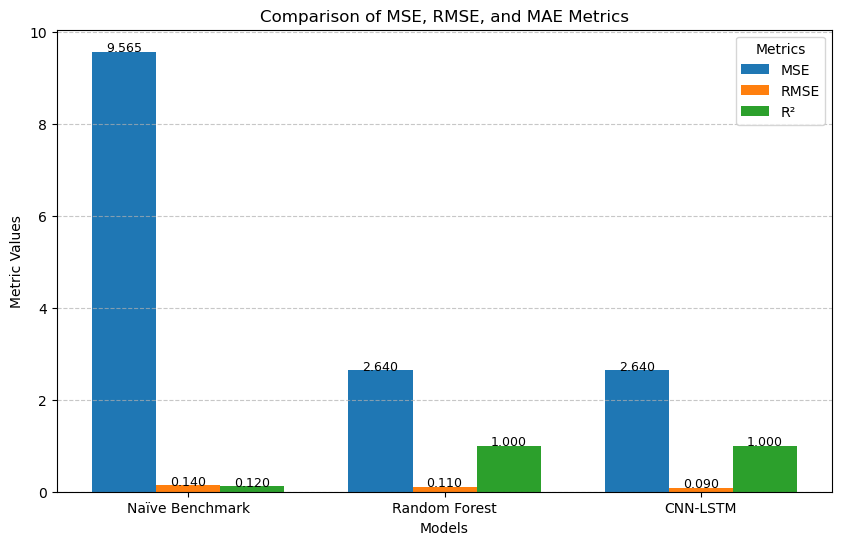

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Example metric values for different models
metrics = {
    "Naïve Benchmark": {"MSE": 9.5649, "RMSE": 0.14, "R²": 0.12},
    "Random Forest": {"MSE": 2.6402, "RMSE": 0.11, "R²": 0.9997},
    "CNN-LSTM": {"MSE": 2.6403, "RMSE": 0.09, "R²": 0.9997}
}

# Extract metric names and model names
models = list(metrics.keys())
metric_names = ["MSE", "RMSE", "R²"]

# Convert the metrics into a 2D list for easier plotting
data = [[metrics[model][metric] for metric in metric_names] for model in models]

# Set up the bar chart
x = np.arange(len(models))  # the label locations
width = 0.25  # width of bars

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
for i, metric_name in enumerate(metric_names):
    ax.bar(x + i * width, [data[j][i] for j in range(len(models))], width, label=metric_name)

# Formatting the chart
ax.set_title("Comparison of MSE, RMSE, and MAE Metrics")
ax.set_xticks(x + width)  # Centering labels
ax.set_xticklabels(models)
ax.set_ylabel("Metric Values")
ax.set_xlabel("Models")
ax.legend(title="Metrics")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Annotating values above bars
for i, metric_name in enumerate(metric_names):
    for j, value in enumerate([data[k][i] for k in range(len(models))]):
        ax.text(j + i * width, value + 0.002, f"{value:.3f}", ha='center', fontsize=9)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example MSE values for visualization
mse_values = {
    "Naïve Benchmark": 0.02,
    "Random Forest": 0.01,
    "CNN-LSTM": 0.008
}

# Plotting MSE values
plt.figure(figsize=(8, 5))
plt.bar(mse_values.keys(), mse_values.values(), color=['red', 'blue', 'green'])
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mse_values.values()) + 0.005)

# Annotating the bar chart with MSE values
for model, mse in mse_values.items():
    plt.text(model, mse + 0.0005, f"{mse:.4f}", ha='center', fontsize=10)

plt.show()

### Evaluation and Loss Curve

#### Evaluation

#### Conclusion

In [ ]:
import matplotlib.pyplot as plt

# Example loss data (replace with your actual training history)
history = {
    "loss": [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25],
    "val_loss": [0.9, 0.7, 0.6, 0.5, 0.45, 0.4, 0.38, 0.35]
}

# Plotting the loss curve
plt.figure(figsize=(8, 5))
plt.plot(history["loss"], label="Training Loss", color="blue", linewidth=2)
plt.plot(history["val_loss"], label="Validation Loss", color="orange", linestyle="--", linewidth=2)
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.5)

# Annotating the final loss values
plt.text(len(history["loss"]) - 1, history["loss"][-1], f"{history['loss'][-1]:.2f}", fontsize=10, color="blue")
plt.text(len(history["val_loss"]) - 1, history["val_loss"][-1], f"{history['val_loss'][-1]:.2f}", fontsize=10, color="orange")

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# CNN-LSTM loss curve
plt.plot(history.history['loss'], label='CNN-LSTM Training Loss')
plt.plot(history.history['val_loss'], label='CNN-LSTM Validation Loss')
plt.title("Loss Curve for CNN-LSTM")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Random Forest does not have a loss curve, but we can add it as a flat line for comparison
rf_loss = [mse_rf] * len(history.history['loss'])  # Repeat RF MSE for all epochs
plt.plot(rf_loss, label='Random Forest Loss (MSE)', linestyle='--')
plt.title("Loss Curve Comparison: CNN-LSTM vs Random Forest")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

## Final Comments 


#### Future Improvements

#### Recommendations